In [2]:
import os, sys, glob
import numpy as np
import scipy.signal as sigpro
import scipy.linalg as scpla

from tqdm.notebook import tqdm
import math
import string
import heapq
from collections import defaultdict
import itertools

%matplotlib notebook
import matplotlib.pyplot as plt

def dprint(lvl, msg, end='\n'):
    if dbg>=lvl:
        print(msg, end=end)


# Problem 15

(100, 100)
60941
[(0, 0, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 198, 'done': False}), (60941, 1, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 198, 'done': False})]
path complete 741 


<IPython.core.display.Javascript object>


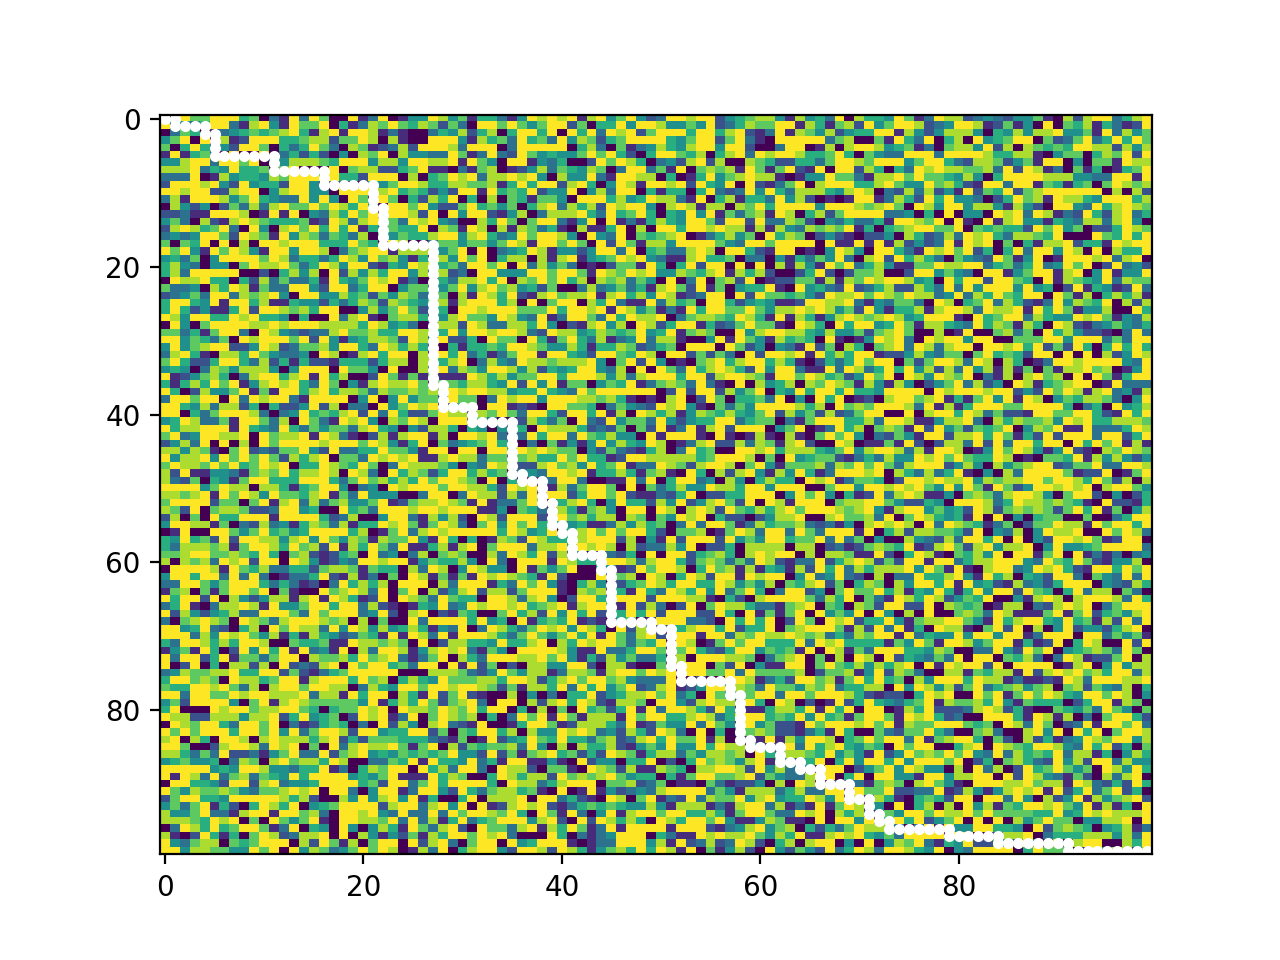

1 paths 10437 pushes.
	Dict cost 741, calc 741
CPU times: user 547 ms, sys: 16.5 ms, total: 563 ms
Wall time: 564 ms


In [2]:

%%time
%matplotlib notebook
if True:
    with open('p15a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in =  ['1163751742',
                '1381373672',
                '2136511328',
                '3694931569',
                '7463417111',
                '1319128137',
                '1359912421',
                '3125421639',
                '1293138521',
                '2311944581']

n = len(data_in)
m = len(data_in[0])

cpth = np.zeros((n,m), dtype='int')
for pln, ln in enumerate(data_in):
    for plm, l in enumerate(ln):
        cpth[pln, plm] = int(l)

print(cpth.shape)

    
def vitpath(cost_map, pst=np.array([0,0], dtype='int'), 
            pnd=np.array([-1,-1], dtype='int'), maxpaths=2**14):
    nxtpst = np.array([[0,1],[1,0],[0,-1],[-1,0]], dtype='int')
    n,m = cost_map.shape
    mrks = ['w.', 'bx', 'r+', 'b.']
    if pnd[0] < 0:
        pnd[0] = n-1
        pnd[1] = m-1
    paths=[]
    ct = 0
    heapq.heappush(paths, 
                   (0, ct, {'pts':np.atleast_2d(pst), 'cost':0, 'heur':np.sum(np.abs(pst-pnd)), 'done':False}))
    ct+=1
    high = np.sum(cost_map)
    print(high)
    
    heapq.heappush(paths, 
                   (high, ct, {'pts':np.atleast_2d(pst), 'cost':0, 'heur':np.sum(np.abs(pst-pnd)), 'done':False}))
    ct+=1
    print(paths)
    best_map = high*np.ones((n,m), dtype='int')
    path_map = -1*np.ones((n,m), dtype='int')
    
    best_map[pst[0], pst[1]] = 0
    path_map[pst[0], pst[1]] = 0
    conter = 0
    maxit = 1e7
    while True:
        conter += 1
        if conter == maxit:
            break
        ncb, _, pth = heapq.heappop(paths)
        
        if len(paths) == 0:
            print(pth)
        
        if not pth['done']:
            #build the four new points
            first = True
            for ii in range(4):
                ph = pth['pts'][-1,:]+nxtpst[ii,:]
                if 0<=ph[0]<n and 0<=ph[1]<m:
                    
                    nc = pth['cost'] + cost_map[ph[0], ph[1]]
                    nh = np.sum(np.abs(ph-pnd))
                    if nc < best_map[ph[0], ph[1]]:
                        if best_map[ph[0], ph[1]] < high:
                            if False:
                                for ip in range(len(paths)):
                                    ipth = len(paths)-1-ip
                                    pen = np.sum(np.abs(paths[ipth]['pts'] - np.atleast_2d(ph)), axis=1)
                                    if pen.min() == 0 and not paths[ipth]['done']:
                                        #print('removing path {}'.format(ipth))
                                        #print('contains {} was {} now {}'.format(ph, best_map[ph[0], ph[1]], nc))
                                        #print(paths[ipth])
                                        #print
                                        del paths[ipth]
                        best_map[ph[0], ph[1]] = nc
                        #add this one
                        first = False
                        if ph[0]==pnd[0] and ph[1]==pnd[1]:
                            heapq.heappush(paths, (nc+nh, ct,
                                            {'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                                             'cost':nc, 'heur':0, 'done':True}))
                            ct += 1
                            print('path complete {} '.format(nc))
                        else:
                            #print('Pushing the path')
                            #print(paths)
                            #print(nc,nh)
                            #print({'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                            #                 'cost':nc, 'heur':0, 'done':False})
                            heapq.heappush(paths, (nc+nh, ct,
                                            {'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                                             'cost':nc, 'heur':nh, 'done':False}))
                            ct += 1
            #if first:
            #    print('nothing put away')
        else:
            complete = True
            heapq.heappush(paths, (ncb, ct, pth))
            ct += 1
            break
        #print(conter)
        #print()
        
    _=plt.figure()
    _=plt.imshow(cost_map, aspect='auto')
    colorwheel = ['w', 'b', 'k', 'r', 'g']
    bestcost, its, bestpath = heapq.heappop(paths)
    css = -cost_map[0,0]
    for pos in bestpath['pts']:
        _=plt.plot(pos[1], pos[0], 'w.')
        css += cost_map[pos[0], pos[1]]
        
    print('{} paths {} pushes.\n\tDict cost {}, calc {}'.format(len(paths), its, bestpath['cost'], css))
    
    #_=plt.figure()
    #best_map[best_map == high] = -1
    #_=plt.imshow(best_map, aspect='auto')
    #_=plt.imshow(10*np.log10(1+best_map), aspect='auto')
    
    
    return bestpath
                                
                                
                            

bp1 = vitpath(cpth, pst=np.array([0,0], dtype='int'), pnd=np.array([-1,-1], dtype='int'))

1184856
[(0, 0, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 998, 'done': False}), (1184856, 1, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 998, 'done': False})]
path complete 2976 


<IPython.core.display.Javascript object>


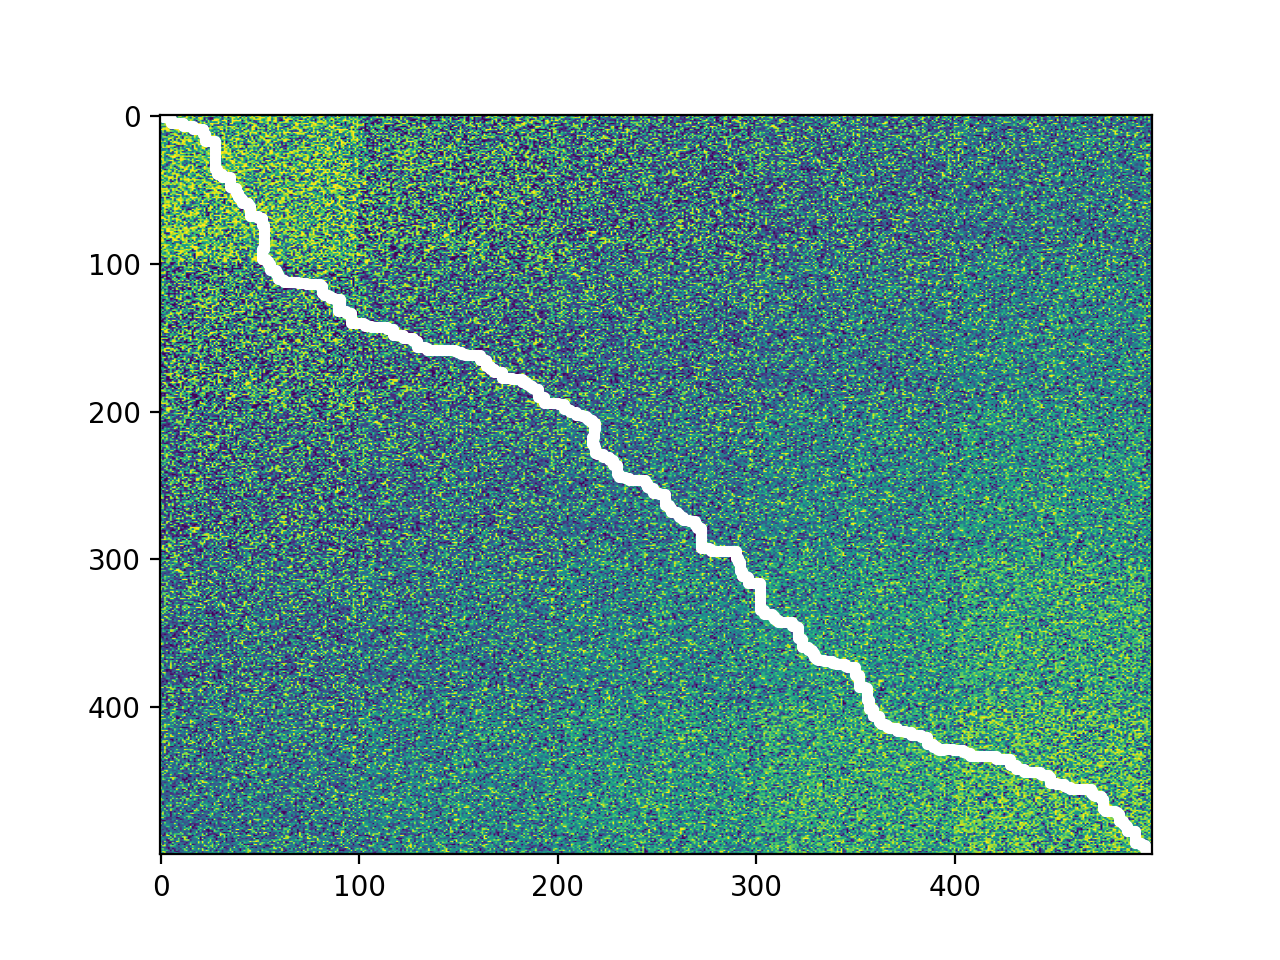

3 paths 265303 pushes.
	Dict cost 2976, calc 2976
CPU times: user 10.5 s, sys: 78.5 ms, total: 10.6 s
Wall time: 10.6 s


In [3]:
%%time
cpfull = np.zeros((500,500), dtype='int')
cpp = np.zeros((100,100,9), dtype='int')
cpp[:,:,0] = cpth
#print(np.sum(cpp))
for ii in range(1,9):
    cpp[:,:,ii] = cpp[:,:,ii-1]%9+1

cpfull[:100,:][:,:100] = cpp[:,:,0]
cpfull[:100,:][:,100:200] = cpp[:,:,1]
cpfull[:100,:][:,200:300] = cpp[:,:,2]
cpfull[:100,:][:,300:400] = cpp[:,:,3]
cpfull[:100,:][:,400:500] = cpp[:,:,4]

cpfull[100:200,:][:,:100] = cpp[:,:,1]
cpfull[100:200,:][:,100:200] = cpp[:,:,2]
cpfull[100:200,:][:,200:300] = cpp[:,:,3]
cpfull[100:200,:][:,300:400] = cpp[:,:,4]
cpfull[100:200,:][:,400:500] = cpp[:,:,5]

cpfull[200:300,:][:,:100] = cpp[:,:,2]
cpfull[200:300,:][:,100:200] = cpp[:,:,3]
cpfull[200:300,:][:,200:300] = cpp[:,:,4]
cpfull[200:300,:][:,300:400] = cpp[:,:,5]
cpfull[200:300,:][:,400:500] = cpp[:,:,6]

cpfull[300:400,:][:,:100] = cpp[:,:,3]
cpfull[300:400,:][:,100:200] = cpp[:,:,4]
cpfull[300:400,:][:,200:300] = cpp[:,:,5]
cpfull[300:400,:][:,300:400] = cpp[:,:,6]
cpfull[300:400,:][:,400:500] = cpp[:,:,7]

cpfull[400:500,:][:,:100] = cpp[:,:,4]
cpfull[400:500,:][:,100:200] = cpp[:,:,5]
cpfull[400:500,:][:,200:300] = cpp[:,:,6]
cpfull[400:500,:][:,300:400] = cpp[:,:,7]
cpfull[400:500,:][:,400:500] = cpp[:,:,8]

#print(cpfull.shape)
#print(np.sum(cpfull))

bp2 = vitpath(cpfull, pst=np.array([0,0], dtype='int'), pnd=np.array([-1,-1], dtype='int'))


# Problem 16

In [7]:
if True:
    with open('p16a_input.txt', 'r') as fid:
        data_in = fid.read().strip()
else:
    data_in = ['D2FE28',
               '38006F45291200',
               'EE00D40C823060',
               '8A004A801A8002F478',
               '620080001611562C8802118E34',
               'C0015000016115A2E0802F182340',
               'A0016C880162017C3686B18A3D4780',
               'C200B40A82',
               '04005AC33890',
               '880086C3E88112',
               '9C0141080250320F1802104A08'][-1]
            

        
dbg = 0


dprint(1,len(data_in))
dec_in = int(data_in, base=16)
dec1 = int(data_in[0], base=16)

bt = '{}'.format(bin(dec_in))[2:]

zpd = 4*len(data_in) - len(bt)

if zpd>0:
    bt = '0'*zpd + bt
dprint(1,len(bt))

#now parse it
pt = 0

def get_packet(btin):
    
    dprint(2,'Path finding algorithm starting.')
    
    if len(btin)<11:
        return {'type':'empty', 'level':0, 'pv':-1, 'pid':-1, 'mesg':btin}, btin
    
    pv = int(btin[:3], base=2)
    pid = int(btin[3:6], base=2)
    
    
    # PID rules:
    #    4 is literal read in 5 bit nibblets
    #    not 4 is an operator
    #    tli is the next bit
    # tli rules:
    #    0 :: 15 bits indicate the length in bits
    #    1 :: 11 bits indicate the length in subpackets
    
    if pid == 4:
        pt = 6
        mesg = ''
        while True:
            bt0 = btin[pt]
            mesg = mesg+btin[pt+1:pt+5]
            pt += 5
            if bt0 == '0':
                break
        dprint(5,mesg)
        msgo = {'type':'literal', 'level':0, 'pv':pv, 'pid':pid, 'mesg':mesg}
        dprint(5, '<<<')
        dprint(5, msgo)
        dprint(5, '<<<')
        return msgo, btin[pt:]
    else:
        pt = 6
        tli = btin[pt]
        if tli == '0':
            length_ind = int(btin[pt+1:pt+16], base=2)
            pt += 16
            btsub = btin[pt:pt+length_ind]
            pt += length_ind
            btl = btin[pt:]
            msgo = [{'type':'ops15', 'level':0, 'pv':pv, 'pid':pid, 'mesg':'', 'length':length_ind, 'packet':btsub}]
            dprint(5,'***')
            dprint(5,msgo)
            dprint(5,'***')
            while len(btsub)>10:
                msgn, btsub = get_packet(btsub)
                if type(msgn) is list:
                    for ms in msgn:
                        ms['level'] += 1
                        msgo.append(ms)
                else:
                    msgn['level'] += 1
                    msgo.append(msgn)

            if len(btsub):
                dprint(1,msgo)
                dprint(1,'Unexpected leftover {} left of a {} length packet'.format(len(btsub), length_ind))
                dprint(1,msgn)
                
            
            return msgo, btl
            
        else:
            length_ind = int(btin[pt+1:pt+12], base=2)
            pt += 12
            btsub = btin[pt:]
            msgo = [{'type':'ops11', 'level':0, 'pv':pv, 'pid':pid, 'mesg':'', 'packet':btsub, 'num_packets':length_ind}]
            dprint(5,'!!!')
            dprint(5,msgo)
            dprint(5,'!!!')
            for ipkt in range(length_ind):
                #print('packet {} of {}'.format(ipkt, length_ind))
                msgn, btsub = get_packet(btsub)
                # msgn['pkt_num'] = ipkt
                if type(msgn) is list:
                    for ms in msgn:
                        ms['level'] += 1
                        msgo.append(ms)
                else:
                    msgn['level'] += 1
                    msgo.append(msgn)
            dprint(5, '-'*40)
            for ms in msgo:
                dprint(5,'\t\t{}'.format(ms))
                dprint(5,'...')
            #print('-'*40)
            return msgo, btsub
#
versum = 0
bts = bt+''


mesgs = []
while len(bts)>10:
    print('(re)entering')
    msg, bts = get_packet(bts)
    if type(msg) is list:
        for ms in msg:
            mesgs.append(ms)
    else:
        mesgs.append(msg)

for ms in mesgs:
    versum += ms['pv']
print('\n\nSum of versions {}'.format(versum))

imsg = 0
state = -1
ops = []
while imsg<len(mesgs):
    ms = mesgs[imsg]
    #print(ms)
    if ms['pid'] == 0:
        ops.append({'op':'sum', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 1:
        ops.append({'op':'prod', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 2:
        ops.append({'op':'min', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 3:
        ops.append({'op':'max', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 4:
        ops.append({'op':'val', 'level':ms['level'], 'vals':[int(ms['mesg'], base=2)]})
    elif ms['pid'] == 5:
        ops.append({'op':'gt', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 6:
        ops.append({'op':'lt', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 7:
        ops.append({'op':'eq', 'level':ms['level'], 'vals':[]})
    
    imsg+=1

import numpy as np

for ms in mesgs:
    if ms['level']>=0:
        dprint(2,' '*ms['level'], end='')
        for ky in ms.keys():
            if ky != 'packet':
                dprint(2, '{} :: {}  '.format(ky, ms[ky]), end = '')
        dprint(5,'')


for op in ops:
    if op['level']>=0:
        dprint(3,' '*op['level'], end='')
        dprint(3,op)   
print('='*50)
no = len(ops)
evlevel = 10000000
while evlevel > 0:
    evl = np.array([o['level'] for o in ops])
    evlevel = evl.max()
    dprint(3,'Level {}'.format(evlevel))
    for ii in range(no):
        io = no-1-ii
        if ops[io]['level'] == evlevel:
            if ops[io]['op'] == 'val':
                if len(ops[io]['vals']) == 1:
                    ev = ops[io]['vals'][0]
                else:
                    print('Value oops')
            elif ops[io]['op'] == 'sum':
                ev = sum(ops[io]['vals'])
            elif ops[io]['op'] == 'prod':
                ev = np.prod(np.array(ops[io]['vals']))
            elif ops[io]['op'] == 'min':
                ev = np.array(ops[io]['vals']).min()
            elif ops[io]['op'] == 'max':
                ev = np.array(ops[io]['vals']).max()
            elif ops[io]['op'] == 'gt':
                if len(ops[io]['vals']) == 2:
                    ev = int(ops[io]['vals'][0]>ops[io]['vals'][1])
                else:
                    dprint(1,'> error')
            elif ops[io]['op'] == 'lt':
                if len(ops[io]['vals']) == 2:
                    ev = int(ops[io]['vals'][0]<ops[io]['vals'][1])
                else:
                    dprint(1,'< error')
            elif ops[io]['op'] == 'eq':
                if len(ops[io]['vals']) == 2:
                    ev = int(ops[io]['vals'][0] == ops[io]['vals'][1])
                else:
                    dprint(1,'= error')
                    
            if np.sum(evl[:io] == evlevel-1) > 0:
                idin = np.where(evl[:io] == evlevel-1)[0][-1]    
                ops[idin]['vals'].insert(0, ev)
            
            ops[io]['level'] = -1
    
    for op in ops:
        if op['level']>=0:
            dprint(3,' '*op['level'], end='')
            dprint(3,op)    
    dprint(3,'='*50)

print('ans 2 = {}'.format(ev))

    
    
    #print(ms)
    #if ms['type'] == 'literal':
    #    print('\tliteral: {}'.format((int(ms['mesg'], base=2))))
    #    print()



(re)entering


Sum of versions 893
ans 2 = 4358595186090


# Problem 17

In [26]:

dbg = 1

dprint(0, 'Starting problem 17')



# target area: x=34..67, y=-215..-186
n = 214
ypeak = (n**2+n)/2
print('Answer 1 is {}'.format(ypeak))


# it will work if both x and y are in the region
# The equations are:
#
# x[n] = x[n-1] + vx[n-1]
# vx[n] = vx[n] - sign(vx[n])
# y[n] = y[n-1] + vy[n-1]
# vx[n] = vx[n] - 1

# minimum vx is such that n(n+1)/2 > 34, max is 67
vxmin = 8


vy = 214
y = 0
yp = 0
ctworked = 0

vxmn = 100
vxmx = -100
vymn = 500
vymx = -500

for vxi in range(68):
    for vyi in range(-215, 216):
        vx = vxi
        vy = vyi
        x = 0
        y = 0
        stp = 0
        ypt = 0
        while True:
            stp += 1
            x += vx
            vx -= np.sign(vx)
            y += vy
            ypt = np.maximum(ypt, y)
            vy -= 1
            if -215 <= y <= -186 and 34 <= x <= 67:
                dprint(3,'{} :: {},{} with vels {},{}'.format(stp, x,y,vxi, vyi))
                ctworked += 1
                yp = np.maximum(yp, ypt)
                vxmn = np.minimum(vxmn, vxi)
                vxmx = np.maximum(vxmx, vxi)
                vymn = np.minimum(vymn, vyi)
                vymx = np.maximum(vymx, vyi)
                break
            if y<-215 or x > 67:
                break
print('Max y is {}'.format(yp))
print('Answer 2: {} initial velocities'.format(ctworked))
print('valid velocities\tx {} <-> {}\n\t\t\ty {} <-> {}'.format(vxmn, vxmx, vymn, vymx))


Starting problem 17
Answer 1 is 23005.0
Max y is 23005
Answer 2: 2040 initial velocities
valid velocities	x 8 <-> 67
		y -215 <-> 214


# Problem 18

In [118]:
if True:
    with open('p18a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in = [
                ['[[[[4,3],4],4],[7,[[8,4],9]]]', '[1,1]'],
                ['[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]]',
                '[7,[[[3,7],[4,3]],[[6,3],[8,8]]]]',
                '[[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]]',
                '[[[[2,4],7],[6,[0,5]]],[[[6,8],[2,8]],[[2,1],[4,5]]]]',
                '[7,[5,[[3,8],[1,4]]]]',
                '[[2,[2,2]],[8,[8,1]]]',
                '[2,9]',
                '[1,[[[9,3],9],[[9,0],[0,7]]]]',
                '[[[5,[7,4]],7],1]','[[[[4,2],2],6],[8,7]]'],
                ['[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]]',
                '[7,[[[3,7],[4,3]],[[6,3],[8,8]]]]'],
                ['[[[[4,0],[5,4]],[[7,7],[6,0]]],[[8,[7,7]],[[7,9],[5,0]]]]',
                '[[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]]'],
                ['[[[[6,7],[6,7]],[[7,7],[0,7]]],[[[8,7],[7,7]],[[8,8],[8,0]]]]',
                '[[[[2,4],7],[6,[0,5]]],[[[6,8],[2,8]],[[2,1],[4,5]]]]'],
                ['[[[[7,0],[7,7]],[[7,7],[7,8]]],[[[7,7],[8,8]],[[7,7],[8,7]]]]',
                '[7,[5,[[3,8],[1,4]]]]'],
                ['[[[[7,7],[7,8]],[[9,5],[8,7]]],[[[6,8],[0,8]],[[9,9],[9,0]]]]',
                '[[2,[2,2]],[8,[8,1]]]'],
                ['[[[[6,6],[6,6]],[[6,0],[6,7]]],[[[7,7],[8,9]],[8,[8,1]]]]',
                '[2,9]'],
                ['[[[[6,6],[7,7]],[[0,7],[7,7]]],[[[5,5],[5,6]],9]]',
                '[1,[[[9,3],9],[[9,0],[0,7]]]]'],
                ['[[[[7,8],[6,7]],[[6,8],[0,8]]],[[[7,7],[5,0]],[[5,5],[5,6]]]]',
                '[[[5,[7,4]],7],1]'],
                ['[[[[7,7],[7,7]],[[8,7],[8,7]]],[[[7,0],[7,7]],9]]',
                '[[[[4,2],2],6],[8,7]]'],
                ['[[[0,[5,8]],[[1,7],[9,6]]],[[4,[1,2]],[[1,4],2]]]',
                '[[[5,[2,8]],4],[5,[[9,9],0]]]',
                '[6,[[[6,2],[5,6]],[[7,6],[4,7]]]]',
                '[[[6,[0,7]],[0,9]],[4,[9,[9,0]]]]',
                '[[[7,[6,4]],[3,[1,3]]],[[[5,5],1],9]]',
                '[[6,[[7,3],[3,2]]],[[[3,8],[5,7]],4]]',
                '[[[[5,4],[7,7]],8],[[8,3],8]]',
                '[[9,3],[[9,9],[6,[4,9]]]]',
                '[[2,[[7,7],7]],[[5,8],[[9,3],[0,2]]]]',
                '[[[[5,2],5],[8,[3,7]]],[[5,[7,5]],[4,4]]]']][-1]

#[[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]]
#[[[[4,0],[5,4]],[[7,7],[6,0]]],[[8,[7,7]],[[7,9],[5,0]]]]
#[[[[6,7],[6,7]],[[7,7],[0,7]]],[[[8,7],[7,7]],[[8,8],[8,0]]]]
#[[[[7,0],[7,7]],[[7,7],[7,8]]],[[[7,7],[8,8]],[[7,7],[8,7]]]]
#[[[[7,7],[7,8]],[[9,5],[8,7]]],[[[6,8],[0,8]],[[9,9],[9,0]]]]
#[[[[6,6],[6,6]],[[6,0],[6,7]]],[[[7,7],[8,9]],[8,[8,1]]]]
#[[[[6,6],[7,7]],[[0,7],[7,7]]],[[[5,5],[5,6]],9]]
#[[[[7,8],[6,7]],[[6,8],[0,8]]],[[[7,7],[5,0]],[[5,5],[5,6]]]]
#[[[[7,7],[7,7]],[[8,7],[8,7]]],[[[7,0],[7,7]],9]]
#[[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]]
                
    # data_in = ['']
    

dbg = 7
dprint(0, 'Beginning problem 18')


def snail_add(xl, xr):
    xra = xr.replace('[','').replace(']','').split(',')
    xrl = [int(x, base=10) for x in xra]
    dprint(4, 'right list is {}'.format(xrl))
    if type(xl) is list:
        return [xl, xrl]
    else:
        return xrl

def snail_reduce(xlst, lvl=0):
    if len(xlst) == 2:
        dprint('good list')
    else:
        dprint(0,'Each list should be length 2')
    unchanged = 0
    
    if type(xlst[0]) is int and type(xlst[1]) is int:
        dprint(5, 'Level {} ({}, {})'.format(lvl, xlst[0], xlst[1]))
        if lvl>=4:
            print('Exploding {} t level {}'.format())
    else:
        if type(xlst[0]) is list:
            xl, chl = snail_reduce(xlst[0], lvl=lvl+1)
        else:
            cl, chl = xlst[0], 0
        if type(xlst[1]) is list:
            xr, chr = snail_reduce(xlst[1], lvl=lvl+1)
        else:
            cl, chl = xlst[0], 0
        
        
def format_data(dta):
    
    dprint(3, dta)
    
    lv = -1
    dto = []
    lvo = []
    for d in dta:
        #print(d)
        if d == '[':
            lv += 1
        elif d == ']':
            lv -= 1
        elif d == ',':
            dprint(100, 'skip')
        else:
            dto.append(int(d, base=10))
            lvo.append(lv)
        dprint(14, dto)
        dprint(14, lvo)

    return np.array(dto), np.array(lvo)

def reduce_it(dti, lvi):
    
    dprint(3, 'dt {}'.format(dti))
    dprint(3, 'lv {}'.format(lvi))
    while True:
        expv = np.maximum(4, lvi.max())
        nsl = len(lvi)
        dprint(3,'length {}'.format(nsl))
        idex = np.where(lvi == expv)[0]
        idsp = np.where(dti > 9)[0]
        if False and len(idex) and len(idsp):
            if idex[0] <= idsp[0]:
                dprint(3,'Explode first')
                dmsk = np.ones(nsl, dtype='bool')
                dmsk[idex[1]] = False
                if idex[0]>0:
                    dti[idex[0] - 1] += dti[idex[0]]
                dti[idex[0]] = 0
                lvi[idex[0]] -= 1
                if idex[1]<nsl-1:
                    dti[idex[1] + 1] += dti[idex[1]]
                dti = dti[dmsk]
                lvi = lvi[dmsk]
            else:
                dprint(3,'split first')
                lft = dti[idsp[0]]//2
                rgt = dti[idsp[0]]-lft
                dto = np.zeros(nsl+1, dtype='int')
                dto[:idsp[0]] = dti[:idsp[0]]
                dto[idsp[0]] = lft
                dto[idsp[0]+1] = rgt
                dto[idsp[0]+2:] = dti[idsp[0]+1:]
                
                lvo = np.zeros(nsl+1, dtype='int')
                lvo[:idsp[0]] = lvi[:idsp[0]]
                lvo[idsp[0]] = lvi[idsp[0]] + 1
                lvo[idsp[0]+1] = lvi[idsp[0]] + 1
                lvo[idsp[0]+2:] = lvi[idsp[0]+1:]
                
                dti = dto
                lvi = lvo
        elif len(idex):
            dprint(3,'explode')
            dmsk = np.ones(nsl, dtype='bool')
            dmsk[idex[1]] = False
            if idex[0]>0:
                dti[idex[0] - 1] += dti[idex[0]]
            dti[idex[0]] = 0
            lvi[idex[0]] -= 1
            if idex[1]<nsl-1:
                dti[idex[1] + 1] += dti[idex[1]]
            dti = dti[dmsk]
            lvi = lvi[dmsk]
        elif len(idsp):
            dprint(3,'split')
            lft = dti[idsp[0]]//2
            rgt = dti[idsp[0]]-lft
            dto = np.zeros(nsl+1, dtype='int')
            dto[:idsp[0]] = dti[:idsp[0]]
            dto[idsp[0]] = lft
            dto[idsp[0]+1] = rgt
            dto[idsp[0]+2:] = dti[idsp[0]+1:]

            lvo = np.zeros(nsl+1, dtype='int')
            lvo[:idsp[0]] = lvi[:idsp[0]]
            lvo[idsp[0]] = lvi[idsp[0]] + 1
            lvo[idsp[0]+1] = lvi[idsp[0]] + 1
            lvo[idsp[0]+2:] = lvi[idsp[0]+1:]

            dti = dto
            lvi = lvo
        else:
            break
        dprint(3, 'dt {}'.format(dti))
        dprint(3, 'lv {}'.format(lvi))
        
    return dti, lvi

def list_add(dt0, dt1, lv0, lv1):
    dto = np.concatenate([dt0, dt1])
    lvo = np.concatenate([lv0+1, lv1+1])

    return(dto, lvo)


def list_mag(dti, lvi):
    while len(dti)>1:
        nsl = len(lvi)
        lmx = lvi.max()
        idl = np.where(lvi == lmx)[0]
        msk = np.ones(nsl, dtype='bool')
        nval = dti[idl[0]]*3 + dti[idl[1]]*2
        dti[idl[0]] = nval
        lvi[idl[0]] -= 1
        msk[idl[0]+1] = False
        dti = dti[msk]
        lvi = lvi[msk]
    return dti[0]

dbg = 0
thesum = None
thelevels = None
for dtf in data_in:
    print(dtf)
    dd, ll = format_data(dtf)
    if thesum is None:
        thesum = dd
        thelevels = ll
    else:
        thesum, thelevels = list_add(thesum, dd, thelevels, ll)
    thesum, thelevels = reduce_it(thesum.copy(), thelevels.copy())
print(thesum)
print(thelevels)
print(list_mag(thesum, thelevels))



bestmag = 0
for i1 in range(len(data_in)):
    dtt, ltt = format_data(data_in[i1])
    for i2 in range(len(data_in)):
        dpp, lpp = format_data(data_in[i2])
        thissum, thislevels = list_add(dtt, dpp, ltt, lpp)
        thissum, thislevels = reduce_it(thissum.copy(), thislevels.copy())
        thismag = list_mag(thissum, thislevels)
        if thismag> bestmag:
            bestmag = thismag
            print('{} and {} produce {}'.format(i1, i2, thismag))

# smag = '[[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]]'
# dmag,lmag = format_data(smag)

# print(list_mag(dmag, lmag))

# dtf, lvf = format_data(data_in)
# dprint(3, dtf, lvf)
                
#sl = dtf[0]
#ll = lvf[0]

# for ii in range(1, len(dtf))
# sx1 = '[[[[7,7],[7,7]],[[8,7],[8,7]]],[[[7,0],[7,7]],9]]'
# sx2 = '[[[[4,2],2],6],[8,7]]'
# sx3 = '[[[[8,7],[7,7]],[[8,6],[7,7]]],[[[0,7],[6,6]],[8,7]]]'

# d1, l1 = format_data(sx1)
# d2, l2 = format_data(sx2)

# d3c, l3c = list_add(d1, d2, l1, l2)

# dt3r, lv3r = reduce_it(d3c.copy(), l3c.copy())


# d3, l3 = format_data(sx3)

# a1 = '[[[[4,3],4],4],[7,[[8,4],9]]]'
# a2 = '[1,1]'


# d1a, l1a = format_data(a1)
# d1b, l1b = format_data(a2)
# d1, l1 = list_add(d1a, d1b, l1a, l1b)

# d2, l2 = reduce_it(d1,l1)
# print(d1)
# print(l1)
# print(d2)
# print(l2)








Beginning problem 18
[[[6,[8,3]],[2,0]],[[[9,5],[9,1]],3]]
[[[9,[2,2]],[5,4]],[[[2,2],[9,6]],[7,7]]]
[[[0,[3,2]],1],[[0,[2,8]],[2,[0,4]]]]
[[4,4],[[[7,0],5],[3,1]]]
[[5,4],1]
[[[[7,6],4],9],[[9,1],9]]
[[[1,[7,8]],[[7,7],[1,6]]],[1,[6,[7,1]]]]
[[[[6,8],[5,6]],[[1,1],8]],[[[2,0],[3,1]],[2,[2,6]]]]
[[[6,3],[3,[7,1]]],8]
[[[9,4],[3,[0,6]]],[[2,[3,6]],[[9,8],[1,6]]]]
[9,[0,[[0,7],2]]]
[[[[8,4],7],[[9,2],[0,9]]],[[7,9],[8,[0,9]]]]
[[1,1],[[5,[3,8]],[3,[4,7]]]]
[[[9,[2,9]],[2,[2,9]]],[[[3,5],5],[[3,3],2]]]
[[[[5,4],9],0],[[[5,7],2],[[5,2],9]]]
[[2,[[1,0],[6,2]]],0]
[[[3,7],[7,6]],[[[2,8],5],[3,[9,7]]]]
[[2,[2,[8,8]]],[[[9,9],[1,1]],[[8,6],[0,3]]]]
[[8,1],[3,5]]
[[7,[[7,6],[2,0]]],4]
[[5,4],[[1,3],[5,[2,8]]]]
[7,9]
[[[[6,9],0],[1,[5,0]]],[[[6,4],3],7]]
[[[[3,7],3],[2,6]],[[0,4],[9,9]]]
[[[[1,5],[5,0]],[9,4]],[[[8,3],3],[8,[3,6]]]]
[[[[3,7],5],[[8,5],[1,5]]],[[0,6],[3,4]]]
[[[[4,0],2],[7,[8,4]]],[0,[5,[7,8]]]]
[[[[0,8],[0,4]],[9,3]],[[[5,4],[4,8]],[[1,6],[5,4]]]]
[[0,[0,3]],[[3,[1,5]],[[9,6],[0

# Problem 19

In [28]:
dbg = 5
dprint(0, 'Starting problem 19')
if True:
    with open('p19a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in = [
            '--- scanner 0 ---',
            '404,-588,-901',
            '528,-643,409',
            '-838,591,734',
            '390,-675,-793',
            '-537,-823,-458',
            '-485,-357,347',
            '-345,-311,381',
            '-661,-816,-575',
            '-876,649,763',
            '-618,-824,-621',
            '553,345,-567',
            '474,580,667',
            '-447,-329,318',
            '-584,868,-557',
            '544,-627,-890',
            '564,392,-477',
            '455,729,728',
            '-892,524,684',
            '-689,845,-530',
            '423,-701,434',
            '7,-33,-71',
            '630,319,-379',
            '443,580,662',
            '-789,900,-551',
            '459,-707,401',
            '',
            '--- scanner 1 ---',
            '686,422,578',
            '605,423,415',
            '515,917,-361',
            '-336,658,858',
            '95,138,22',
            '-476,619,847',
            '-340,-569,-846',
            '567,-361,727',
            '-460,603,-452',
            '669,-402,600',
            '729,430,532',
            '-500,-761,534',
            '-322,571,750',
            '-466,-666,-811',
            '-429,-592,574',
            '-355,545,-477',
            '703,-491,-529',
            '-328,-685,520',
            '413,935,-424',
            '-391,539,-444',
            '586,-435,557',
            '-364,-763,-893',
            '807,-499,-711',
            '755,-354,-619',
            '553,889,-390',
            '',
            '--- scanner 2 ---',
            '649,640,665',
            '682,-795,504',
            '-784,533,-524',
            '-644,584,-595',
            '-588,-843,648',
            '-30,6,44',
            '-674,560,763',
            '500,723,-460',
            '609,671,-379',
            '-555,-800,653',
            '-675,-892,-343',
            '697,-426,-610',
            '578,704,681',
            '493,664,-388',
            '-671,-858,530',
            '-667,343,800',
            '571,-461,-707',
            '-138,-166,112',
            '-889,563,-600',
            '646,-828,498',
            '640,759,510',
            '-630,509,768',
            '-681,-892,-333',
            '673,-379,-804',
            '-742,-814,-386',
            '577,-820,562',
            '',
            '--- scanner 3 ---',
            '-589,542,597',
            '605,-692,669',
            '-500,565,-823',
            '-660,373,557',
            '-458,-679,-417',
            '-488,449,543',
            '-626,468,-788',
            '338,-750,-386',
            '528,-832,-391',
            '562,-778,733',
            '-938,-730,414',
            '543,643,-506',
            '-524,371,-870',
            '407,773,750',
            '-104,29,83',
            '378,-903,-323',
            '-778,-728,485',
            '426,699,580',
            '-438,-605,-362',
            '-469,-447,-387',
            '509,732,623',
            '647,635,-688',
            '-868,-804,481',
            '614,-800,639',
            '595,780,-596',
            '',
            '--- scanner 4 ---',
            '727,592,562',
            '-293,-554,779',
            '441,611,-461',
            '-714,465,-776',
            '-743,427,-804',
            '-660,-479,-426',
            '832,-632,460',
            '927,-485,-438',
            '408,393,-506',
            '466,436,-512',
            '110,16,151',
            '-258,-428,682',
            '-393,719,612',
            '-211,-452,876',
            '808,-476,-593',
            '-575,615,604',
            '-485,667,467',
            '-680,325,-822',
            '-627,-443,-432',
            '872,-547,-609',
            '833,512,582',
            '807,604,487',
            '839,-516,451',
            '891,-625,532',
            '-652,-548,-490',
            '30,-46,-14']

    
dddata_in = ['--- scanner 0 ---',
           '-1,-1,1',
           '-2,-2,2',
           '-3,-3,3',
           '-2,-3,1',
           '5,6,-4',
           '8,0,7',
           '',
           '--- scanner 0 ---',
           '1,-1,1',
           '2,-2,2',
           '3,-3,3',
           '2,-1,3',
           '-5,4,-6',
           '-8,-7,0',
           '',
           '--- scanner 0 ---',
           '-1,-1,-1',
           '-2,-2,-2',
           '-3,-3,-3',
           '-1,-3,-2',
           '4,6,5',
           '-7,0,8',
           '',
           '--- scanner 0 ---',
           '1,1,-1',
           '2,2,-2',
           '3,3,-3',
           '1,3,-2',
           '-4,-6,5',
           '7,0,8',
           '',
           '--- scanner 0 ---',
           '1,1,1',
           '2,2,2',
           '3,3,3',
           '3,1,2',
           '-6,-4,-5',
           '0,7,-8']

scans = []
newscan = []
for dt in data_in:
    if 'scanner' in dt:
        newscan = []
    elif len(dt) == 0:
        scans.append(newscan)
    else:
        bcn = tuple([int(a, base=10) for a in dt.split(',')])
        heapq.heappush(newscan, bcn)
        
scans.append(newscan)

print(len(scans))
#print(scans)

scanner = []
scanner_hash = defaultdict(lambda: False)
heapq.heappush(scanner, (0,0,0))

beacons = []
bcn_hash = defaultdict(lambda: False)

for bcn in scans[0]:
    bcn_hash[bcn] = True
    heapq.heappush(beacons, bcn)
    
    
    
#print(beacons)

    
lp = list(itertools.permutations([0,1,2]))
lpnp = np.array(lp, dtype='int')

lsgn = []

for ii in range(8):
    lsgn.append((1-2*(ii>>2), 1-2*(1&(ii>>1)), 1-2*(ii&1)))

iscn = 1
def xform(bcn, perm, msk, xt=(0,0,0)):
    return (xt[0]+bcn[perm[0]]*msk[0],
           xt[1]+bcn[perm[1]]*msk[1],
           xt[2]+bcn[perm[2]]*msk[2])
    

xmnmx = (-1000,1000)
ymnmx = (-1000,1000)
zmnmx = (-1000,1000)

print('Length of the known beacons: {}'.format(len(beacons)))

scn2do = [a for a in range(1,len(scans))]

ct = 0
while len(scn2do) > 0:
    
    iscn = scn2do[ct%len(scn2do)]
    breakit = False
    ct += 1
    print('Doing {} of {}'.format(iscn, scn2do))

    for bcnbase in scans[iscn]:
        for perm in lp:
            for msk in lsgn:
                #print(bcnbase)
                bcp = xform(bcnbase, perm, msk)
                #print(bcnbase, bcp)
                for kb in beacons:
                    scnp = (kb[0]-bcp[0], kb[1]-bcp[1], kb[2]-bcp[2]) 

                    #print(kb, bcp, scnp)

                    nz = 0
                    for bca in scans[iscn]:
                        bcpp = xform(bca, perm, msk, scnp)
                        #print(bcpp)
                        #if xmnmx[0]<=bcpp[0]<=xmnmx[1]:
                        #    if ymnmx[0]<=bcpp[1]<=ymnmx[1]:
                        #        if zmnmx[0]<=bcpp[2]<=zmnmx[1]:
                        if bcn_hash[bcpp]:
                            nz += 1
                    if nz == 0:
                        print('---')
                        print(bcnbase, perm, msk)
                        print(kb, bcp, scnp)
                        for bcp in scans[iscn]:
                            bcpp = xform(bcp, perm, msk, scnp)
                            print(bcpp)
                    elif nz > 11:
                        print('Found it?')
                        print('{}, {}, {} zeros'.format(perm, msk, nz))
                        breakit = True
                        scn2do.remove(iscn)
                        heapq.heappush(scanner, scnp)
                        for bcp in scans[iscn]:
                            bcpp = xform(bcp, perm, msk, scnp)
                            if not bcn_hash[bcpp]:
                                heapq.heappush(beacons, bcpp)
                                bcn_hash[bcpp] = True

                        break
                    # print('{}, {}, {} zeros'.format(perm, msk, nz))
                    #breakit = True
                    #break
                if breakit:
                    break
            if breakit:
                break
        if breakit:
            break

print('Length of the known beacons: {}'.format(len(beacons)))    
print(scanner)
#print(bcn_hash[bcnchk])



Starting problem 19
36
Length of the known beacons: 25
Doing 1 of [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Doing 2 of [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Found it?
(0, 2, 1), (1, 1, -1), 12 zeros
Doing 4 of [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Found it?
(1, 0, 2), (-1, -1, -1), 12 zeros
Doing 6 of [1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Doing 7 of [1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Doing 8 of [1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Doing 9 of [1, 3, 5, 6

Doing 14 of [1, 5, 14, 26]
Doing 26 of [1, 5, 14, 26]
Found it?
(2, 0, 1), (1, 1, 1), 18 zeros
Doing 5 of [1, 5, 14]
Found it?
(1, 2, 0), (1, 1, 1), 12 zeros
Doing 14 of [1, 14]
Found it?
(2, 1, 0), (-1, -1, -1), 12 zeros
Doing 1 of [1]
Found it?
(2, 0, 1), (-1, -1, 1), 24 zeros
Length of the known beacons: 408
[(-5870, 1170, -9), (-4827, 1225, -61), (-3514, -71, -1303), (-4699, 2391, -178), (-2277, -1225, 1187), (-2405, 1208, 2353), (-3448, -14, -69), (-4639, -75, -58), (-2340, 45, 2245), (-2245, -1238, 2243), (-1132, 1145, 1047), (-1164, 75, -1298), (-2373, -94, 1157), (-2303, 1234, 1201), (-3437, 1132, -84), (-1163, -1113, 1084), (-2352, -32, -1202), (-1097, -1125, 2394), (-11, -1141, 1124), (85, 1284, -8), (0, 0, 0), (140, -1224, 2275), (-1065, -43, -2540), (1283, 26, 1043), (-1116, 54, 2257), (8, -1116, 3605), (-2363, -14, -95), (1285, -1180, 2362), (-1120, 73, -57), (-13, -2341, 1101), (-2373, -96, 3436), (1299, -1266, 1187), (62, 83, 1085), (1198, -1288, 3594), (-2268, 2335, 121

In [29]:
def mandist(a,b):
    return np.sum(np.abs(np.array(a)-np.array(b)))

mxd = 0
for sca in scanner:
    for scb in scanner:
        dis = mandist(sca, scb);
        if dis > mxd:
            mxd = dis
print('max man distance is {}'.format(mxd))


max man distance is 13348


# Problem 20

Starting problem 20
512


<IPython.core.display.Javascript object>


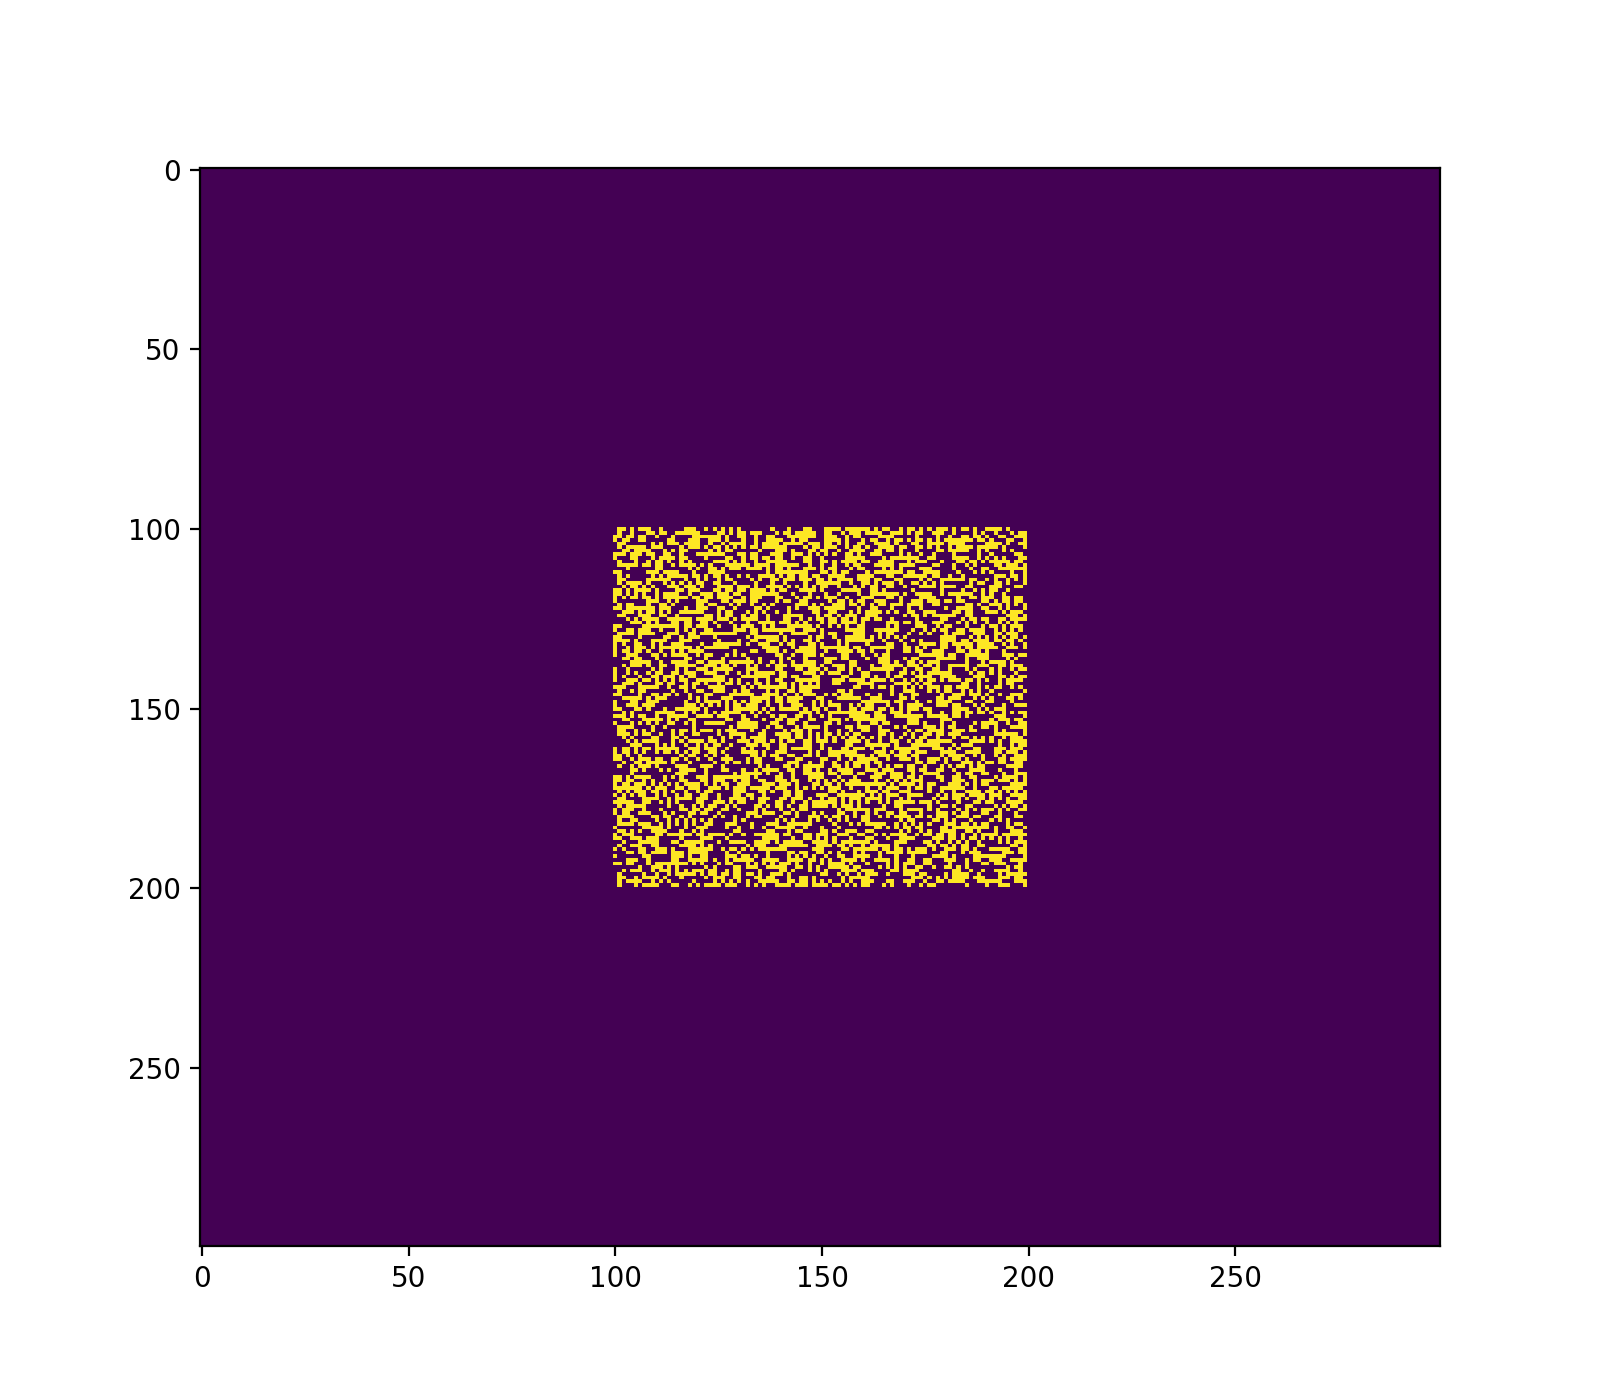

5031


<IPython.core.display.Javascript object>


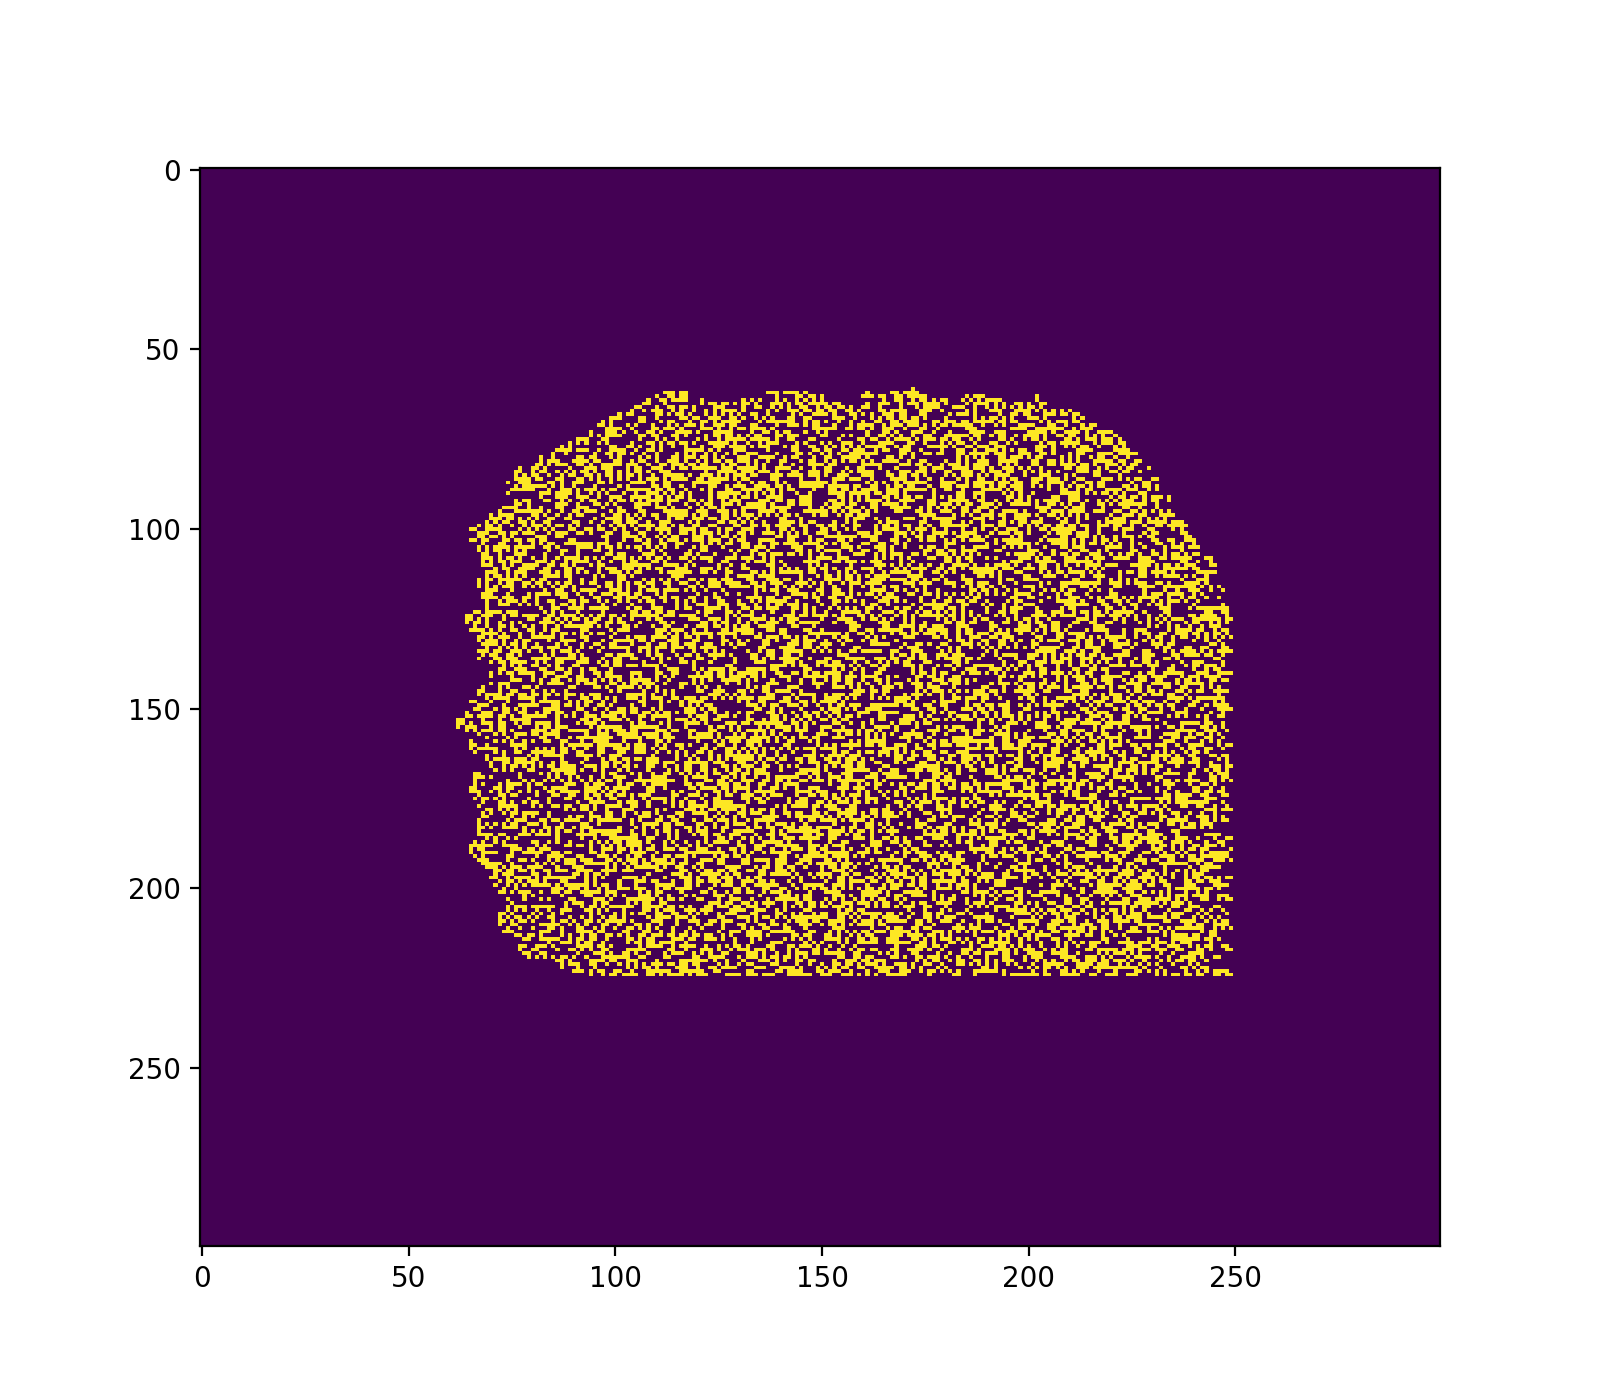

13202
13202


In [53]:
dbg = 5
dprint(0, 'Starting problem 20')


if True:
    with open('p20a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in = ['..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..###..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#..#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#......#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#.....####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.......##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#',
               '',
               '#..#.',
               '#....',
               '##..#',
               '..#..',
               '..###']
subtbl = [int(a, base=10) for a in data_in[0].replace('.','0').replace('#','1')]

print(len(subtbl))

nrow = len(data_in)-2
ncol = len(data_in[2])
npad = 300
zim = np.zeros((nrow+2*npad, ncol+2*npad), dtype='int')

for irow, row in enumerate(data_in[2:]):
    for icol, acol in enumerate(row.replace('.','0').replace('#','1')):
        #print(irow, icol, acol)
        #print(irow, icol, type(acol))
        zim[irow+npad, icol+npad] = int(acol, base=10)
        
_=plt.figure(figsize = (8,7))
_=plt.imshow(zim, aspect='auto')

print(np.sum(zim))

def sub_it(zimin, subtbl):
    zimout = np.zeros_like(zim)
    nr, nc = zimin.shape
    
    for ir in range(1, nr-1):
        for ic in range(1, nc-1):
            subtile = zimin[ir-1:ir+2, :][:, ic-1:ic+2]
            indx = int(''.join(['{}'.format(b) for b in subtile.reshape(-1)]), base=2)
            zimout[ir,ic] = subtbl[indx]
    return zimout

zim2 = zim.copy()

for ii in range(50):
    zim2 = sub_it(zim2, subtbl)
    if ii%2 == 1:
        zim2[:,:5] = 0
        zim2[:,-5:] = 0
        zim2[:5,:] = 0
        zim2[-5:,:] = 0
    
    

_=plt.figure(figsize = (8,7))
_=plt.imshow(zim2, aspect='auto')

print(np.sum(zim2))
print(np.sum(zim2[10:-10,:][:, 10:-10]))





0110101110010000011100101010101000000010001000110001111011111101011001011010101110101101001111010000


In [37]:
print(subtbl)

[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 